In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Importing data files

pollution_data_df = pd.read_csv("Resources/pollution_2006_2010.csv")

pollution_data_df

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181235,397527,397527,Solano,Vallejo,2010,Parts per billion,11.956522,30.7,6,28,...,Parts per billion,0.385714,0.7,23,NaN,Parts per million,0.287500,0.5,23,6.0
181236,397528,397528,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,...,Parts per billion,0.834783,1.8,1,1.0,Parts per million,0.578261,1.6,1,NaN
181237,397529,397529,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,...,Parts per billion,0.834783,1.8,1,1.0,Parts per million,0.641667,1.2,5,14.0
181238,397530,397530,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,...,Parts per billion,0.757143,1.5,2,NaN,Parts per million,0.578261,1.6,1,NaN


In [13]:
# Removing decimal and zero from 'Year' column
pollution_data_df['Year'] = pollution_data_df['Year'].astype(str).replace('\.0', '', regex=True)
pollution_data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


####  Relationship between years and pollutants:

####  1- Years verses NO2 AQI (Nitrogen dioxide Air Quality Index):

In [43]:
avg_no2_df = pollution_data_df.groupby(['Year']).agg({'NO2 AQI': [np.mean]})
avg_no2_df

,NO2 AQI
,mean
Year,
2006,25.066858
2007,23.675629
2008,23.720774
2009,22.838768
2010,21.960830


In [44]:
# rename columns
avg_no2_df.columns = ['NO2_AQI_Mean']
avg_no2_df

,NO2_AQI_Mean
Year,
2006,25.066858
2007,23.675629
2008,23.720774
2009,22.838768
2010,21.960830


<IPython.core.display.Javascript object>


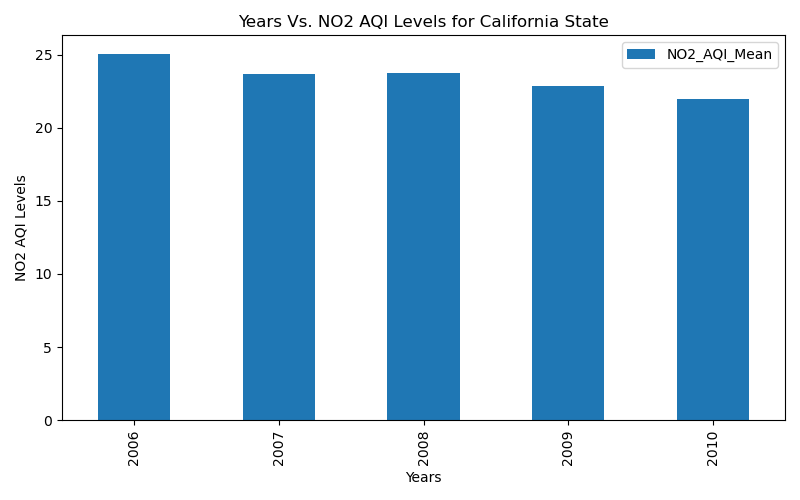

In [61]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
avg_no2_df.plot(kind="bar", figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Years Vs. NO2 AQI Levels for California State")
plt.xlabel("Years")
plt.ylabel("NO2 AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/years_no2.png')

####  2- Years verses SO2 AQI (Sulphur dioxide Air Quality Index):

In [46]:
avg_so2_df = pollution_data_df.groupby(['Year']).agg({'SO2 AQI': [np.mean]})
avg_so2_df

,SO2 AQI
,mean
Year,
2006,4.758542
2007,3.937925
2008,3.550363
2009,2.835863
2010,2.085824


In [47]:
# rename columns
avg_so2_df.columns = ['SO2_AQI_Mean']
avg_so2_df

,SO2_AQI_Mean
Year,
2006,4.758542
2007,3.937925
2008,3.550363
2009,2.835863
2010,2.085824


<IPython.core.display.Javascript object>


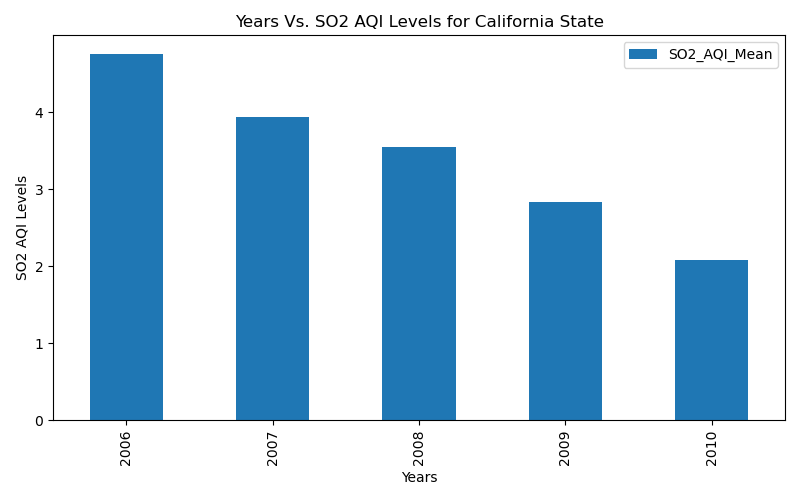

In [60]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
avg_so2_df.plot(kind="bar", figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Years Vs. SO2 AQI Levels for California State")
plt.xlabel("Years")
plt.ylabel("SO2 AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/years_so2.png')

####  3- Years verses CO AQI (Carbon monoxide Air Quality Index):

In [51]:
avg_co_df = pollution_data_df.groupby(['Year']).agg({'CO AQI': [np.mean]})
avg_co_df

,CO AQI
,mean
Year,
2006,7.403125
2007,6.735081
2008,6.336745
2009,6.420749
2010,5.539193


In [52]:
# rename columns
avg_co_df.columns = ['CO_AQI_Mean']
avg_co_df

,CO_AQI_Mean
Year,
2006,7.403125
2007,6.735081
2008,6.336745
2009,6.420749
2010,5.539193


<IPython.core.display.Javascript object>


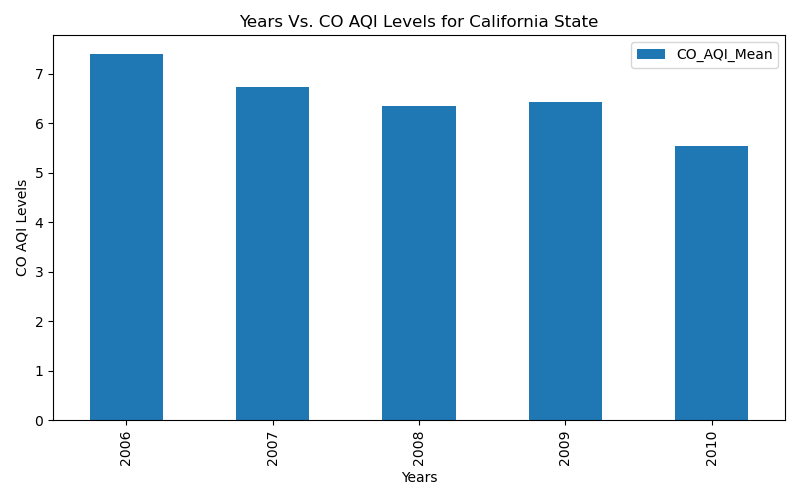

In [59]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
avg_co_df.plot(kind="bar", figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Years Vs. CO AQI Levels for California State")
plt.xlabel("Years")
plt.ylabel("CO AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/years_co.png')

####  4- Years verses O3 AQI (Ozone Air Quality Index):

In [54]:
avg_o3_df = pollution_data_df.groupby(['Year']).agg({'O3 AQI': [np.mean]})
avg_o3_df

,O3 AQI
,mean
Year,
2006,34.933054
2007,34.514307
2008,36.653721
2009,35.336751
2010,33.543562


In [55]:
# rename columns
avg_o3_df.columns = ['O3_AQI_Mean']
avg_o3_df

,O3_AQI_Mean
Year,
2006,34.933054
2007,34.514307
2008,36.653721
2009,35.336751
2010,33.543562


<IPython.core.display.Javascript object>


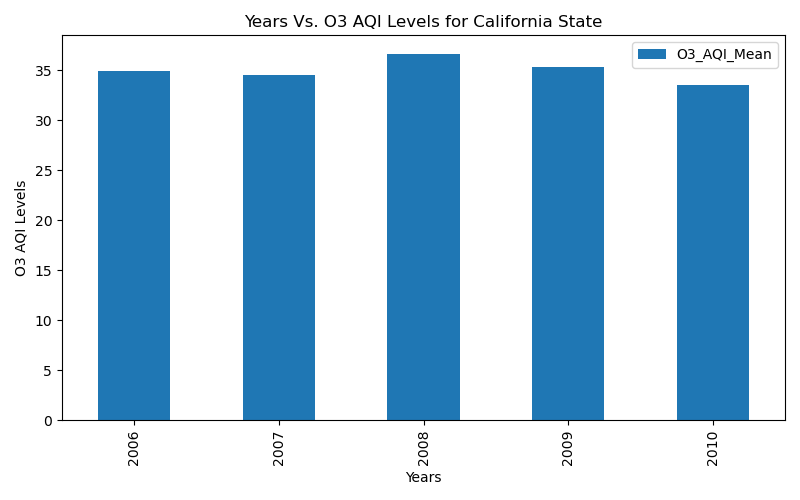

In [58]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
avg_o3_df.plot(kind="bar", figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Years Vs. O3 AQI Levels for California State")
plt.xlabel("Years")
plt.ylabel("O3 AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/years_o3.png')